## Normalisation d'histogramme et visualisation de bonnes moyennes d'histogramme d'échantillon

Traiter des images de différentes tailles nécessite un prétraitement pour les ajuster à un modèle, et cela se reflète également dans les histogrammes de ces images. Les histogrammes d'images de tailles différentes ont des hauteurs différentes, ce qui gêne l'apprentissage de différents types de modèles. Une façon de sortir de ce type de situation est de normaliser les données, de sorte que tous les histogrammes aient le même formatage sans perdre une grande partie de leurs caractéristiques. Nous vérifierons le résultat de cette méthode dans ce cahier.

Une autre chose nécessaire pour poursuivre la vérification de cette hypothèse est de vérifier les moyennes des histogrammes des documents, et pas seulement les histogrammes d'un seul échantillon représentatif, car il n'est possible d'effectuer cette moyenne que par la normalisation des histogrammes.

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [2]:
plt.style.use('ggplot')

## 1. Comparaison entre un histogramme avec des valeurs "brutes" et normalisées

In [4]:
img = cv2.cvtColor(cv2.imread('BID-Dataset/RG_Recto/00022188_in.jpg'), cv2.COLOR_BGR2RGB)
hist = []      # liste pour enregistrer les histogrammes "bruts"
hist_norm = [] # liste pour enregistrer les histogrammes normalisés
hist.append(cv2.calcHist(img,[0],None,[256],[0,256]))  # histogramme "brut" rouge
hist.append(cv2.calcHist(img,[1],None,[256],[0,256]))  # histogramme "brut" vert
hist.append(cv2.calcHist(img,[2],None,[256],[0,256]))  # histogramme "brut" bleu
for j in range(0,3):     # Boucle pour normaliser tous les histogrammes 
    mm = MinMaxScaler()  # Instanciation d'objet avec la fonction normalize 
    hist_norm.append(mm.fit_transform(hist[j], hist[j])) # Normalisation de chaque canal selon ses caractéristiques

In [6]:
help(MinMaxScaler)

Help on class MinMaxScaler in module sklearn.preprocessing._data:

class MinMaxScaler(sklearn.base._OneToOneFeatureMixin, sklearn.base.TransformerMixin, sklearn.base.BaseEstimator)
 |  MinMaxScaler(feature_range=(0, 1), *, copy=True, clip=False)
 |  
 |  Transform features by scaling each feature to a given range.
 |  
 |  This estimator scales and translates each feature individually such
 |  that it is in the given range on the training set, e.g. between
 |  zero and one.
 |  
 |  The transformation is given by::
 |  
 |      X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
 |      X_scaled = X_std * (max - min) + min
 |  
 |  where min, max = feature_range.
 |  
 |  This transformation is often used as an alternative to zero mean,
 |  unit variance scaling.
 |  
 |  Read more in the :ref:`User Guide <preprocessing_scaler>`.
 |  
 |  Parameters
 |  ----------
 |  feature_range : tuple (min, max), default=(0, 1)
 |      Desired range of transformed data.
 |  
 |  copy : b

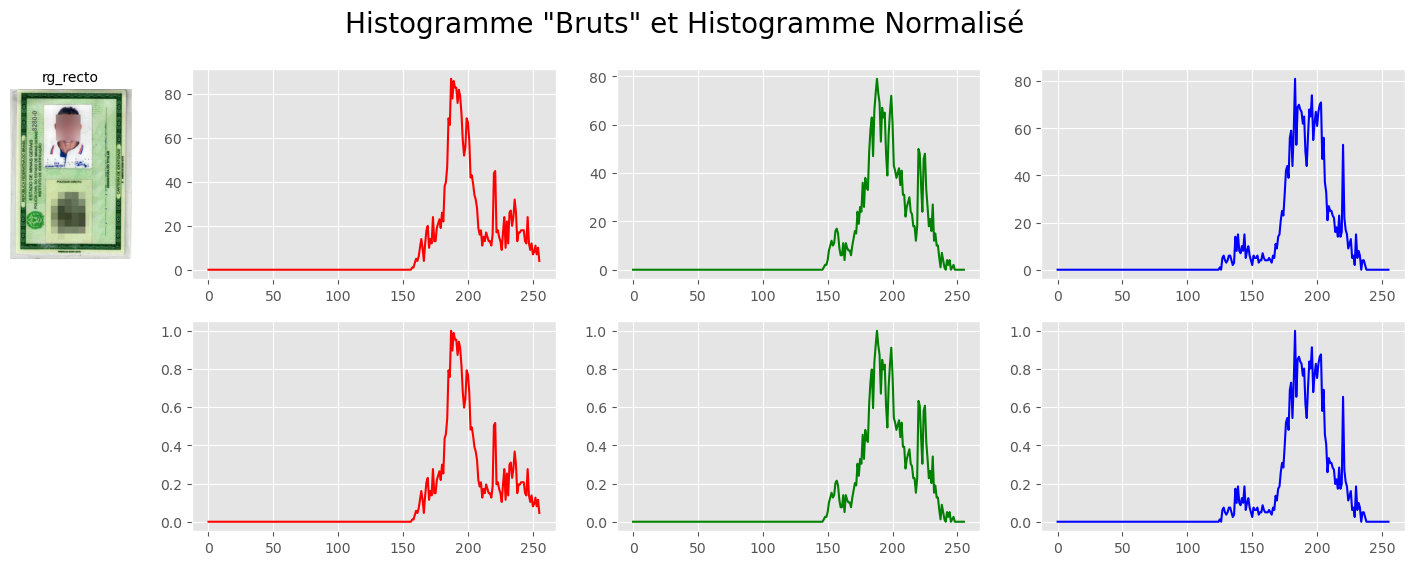

In [8]:
# Maintenant on trace les deux types d'histogramme
n = 2 # Nombre de lignes de parcelle
# Définition de l'intrigue "squelette" et paramètres de grille
fig , ax = plt.subplots(n, 4, figsize=(18,3*n), gridspec_kw={'width_ratios': [1,3,3,3]})

# Ajuste
ax.flatten()
ax = ax.T.flatten()

ax[0].imshow(img) # Tracer le document
ax[0].axis('off')
ax[0].set_title('rg_recto',fontsize=10)
ax[1].plot(' ')  # Quitter l'espace en aval
ax[1].axis('off')

# Tracer des histrogrammes "bruts"
ax[2].plot(hist[0], color='red')
ax[4].plot(hist[1], color='green')
ax[6].plot(hist[2], color='blue')

# Tracer des histogrammes normaliser
ax[3].plot(hist_norm[0], color='red')
ax[5].plot(hist_norm[1], color='green')
ax[7].plot(hist_norm[2], color='blue')
    
fig.suptitle('Histogramme "Bruts" et Histogramme Normalisé', fontsize=20)
plt.show()

La forme de l'histogramme normalisé est identique à l'histogramme "brut".

## 2. Histogrammes moyens d'un ensemble de bons échantillons

In [23]:
!pwd
!ls

/Users/cyrilleedzang/Documents/Formations/greta-Python/notes_de_cours/workplace/card-data
BID Dataset.zip                       Hypothese_1.3.ipynb
BID-Dataset                           Hypothèse_1_2.ipynb
BID_Dataset.docx                      Hypothese_1_Analyse-Colors-Docs.ipynb
Hypothese1.1.ipynb                    classification-histogrammes.ipynb


In [18]:
## récupérer les 20 premières urls rouges
# pour parcourir les repertoires
#import glob
#import os
#from pathlib import Path
urls = []
url_prefix = 'BID-Dataset/RG_Recto/000'
url_sufix = '_in.jpg'
for i in range(22188,22209):
    urls.append(url_prefix+str(i)+url_sufix)
urls



['BID-Dataset/RG_Recto/00022188_in.jpg',
 'BID-Dataset/RG_Recto/00022189_in.jpg',
 'BID-Dataset/RG_Recto/00022190_in.jpg',
 'BID-Dataset/RG_Recto/00022191_in.jpg',
 'BID-Dataset/RG_Recto/00022192_in.jpg',
 'BID-Dataset/RG_Recto/00022193_in.jpg',
 'BID-Dataset/RG_Recto/00022194_in.jpg',
 'BID-Dataset/RG_Recto/00022195_in.jpg',
 'BID-Dataset/RG_Recto/00022196_in.jpg',
 'BID-Dataset/RG_Recto/00022197_in.jpg',
 'BID-Dataset/RG_Recto/00022198_in.jpg',
 'BID-Dataset/RG_Recto/00022199_in.jpg',
 'BID-Dataset/RG_Recto/00022200_in.jpg',
 'BID-Dataset/RG_Recto/00022201_in.jpg',
 'BID-Dataset/RG_Recto/00022202_in.jpg',
 'BID-Dataset/RG_Recto/00022203_in.jpg',
 'BID-Dataset/RG_Recto/00022204_in.jpg',
 'BID-Dataset/RG_Recto/00022205_in.jpg',
 'BID-Dataset/RG_Recto/00022206_in.jpg',
 'BID-Dataset/RG_Recto/00022207_in.jpg',
 'BID-Dataset/RG_Recto/00022208_in.jpg']

In [19]:
# Processus similaire à celui précédent
rg_recto = []
for i in range(20): # La différence est que nous le faisons maintenant dans une boucle pour plusieurs échantillons
    hist = []
#    rg_recto.append(cv2.cvtColor(cv2.imread('BID-Dataset/RG_Recto/000'+str(i)+'_in.jpg'), cv2.COLOR_BGR2RGB))
    rg_recto.append(cv2.cvtColor(cv2.imread(urls[i]), cv2.COLOR_BGR2RGB))
    hist.append(cv2.calcHist(rg_recto[i],[0],None,[256],[0,256]))
    hist.append(cv2.calcHist(rg_recto[i],[1],None,[256],[0,256]))
    hist.append(cv2.calcHist(rg_recto[i],[2],None,[256],[0,256]))
    for j in range(0,3):
        mm = MinMaxScaler()
        hist[j] = mm.fit_transform(hist[j], hist[j])
    rg_recto[i] = hist

In [20]:
# Moyenne des canaux de couleur
# Tout d'abord, nous définissons les variables auxiliaires
sum_red = 0
sum_green = 0
sum_blue = 0

for i in range(len(rg_recto)): # Boucle pour additionner tous les histogrammes
    sum_red += rg_recto[i][0]
    sum_green += rg_recto[i][1]
    sum_blue += rg_recto[i][2]
    
sum_red = sum_red/len(rg_recto) # Division de la somme par le nombre d'échantillons pour obtenir la moyenne
sum_green = sum_green/len(rg_recto)
sum_blue = sum_blue/len(rg_recto)

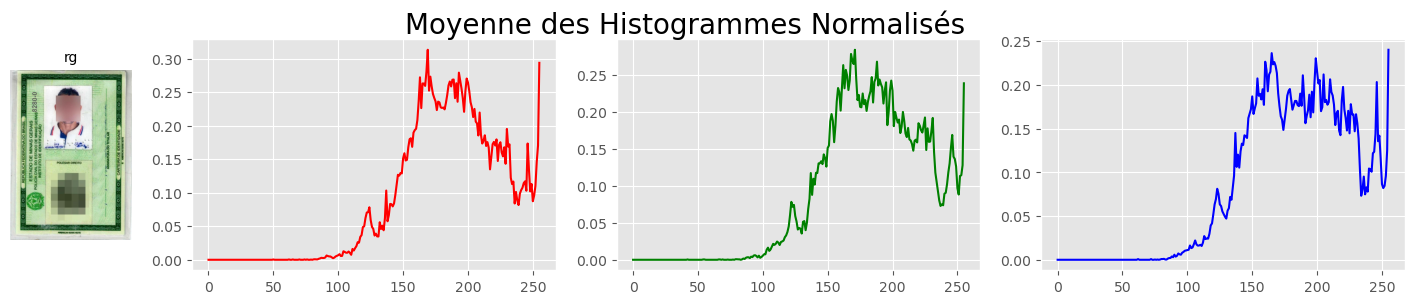

In [21]:
# Plot das médias, processo análogo ao plot anteior
n = 1
fig , ax = plt.subplots(n, 4, figsize=(18,3*n), gridspec_kw={'width_ratios': [1,3,3,3]})

cont = 0
ax.flatten()
ax = ax.T.flatten()

ax[0].imshow(img)
ax[0].axis('off')
ax[0].set_title('rg',fontsize=10)

ax[1].plot(sum_red, color='red');
ax[2].plot(sum_green, color='green')
ax[3].plot(sum_blue, color='blue')
    
fig.suptitle('Moyenne des Histogrammes Normalisés', fontsize=20)
plt.show()

Maintenant que le processus est défini, nous pouvons le généraliser pour l'exécuter sur tous les documents en même temps.

In [24]:
documents = ['BID-Dataset/CPF_Recto','BID-Dataset/CPF_Verso','BID-Dataset/RG_Recto','BID-Dataset/RG_Verso','BID-Dataset/CNH_Recto','BID-Dataset/CNH_Verso']

In [ ]:
## récupérer les 20 premières urls rouges
import glob
import os
from pathlib import Path
for doc in documents:
    url = Path(str(doc))
urls = []
url_prefix = 'BID-Dataset/RG_Recto/000'
url_sufix = '_in.jpg'
for i in range(22188,22209):
    urls.append(url_prefix+str(i)+url_sufix)
urls

In [ ]:
# Boucle pour répéter les processus précédents une fois pour tous les documents
medias = {}    # Dictionnaire pour stocker toutes les échantillons des documents et les moyennes des histogrammes
for k in documents:    # Boucle itérant sur la liste de noms.
    doc = []            # Liste pour enregistrer les documents
    for i in range(0,20):   # Boucle pour normaliser tous les histogrammes du document en cours.
        hist = []     # Liste pour enregistrer les histogrammes
        # Ouvre et convertit le système de couleurs en RGB.
        doc.append(cv2.cvtColor(cv2.imread('amostras_boas/'+k+'/'+k+' ('+str(i+1)+').jpg'), cv2.COLOR_BGR2RGB))
         
        hist.append(cv2.calcHist(doc[i],[0],None,[256],[0,256]))  # Processus similaire au précédent pour 
        hist.append(cv2.calcHist(doc[i],[1],None,[256],[0,256]))  # Calculer la moyenne des histogrammes
        hist.append(cv2.calcHist(doc[i],[2],None,[256],[0,256]))
        for j in range(0,3):
            mm = MinMaxScaler()
            hist[j] = mm.fit_transform(hist[j], hist[j])
        doc[i] = hist

    # Calcul des moyennes
    sum_red = 0
    sum_green = 0
    sum_blue = 0
    
    for i in range(len(doc)):  # somme de toutes les valeurs
        sum_red += doc[i][0]
        sum_green += doc[i][1]
        sum_blue += doc[i][2]
        
    sum_red = sum_red/len(doc) # En divisant par le nombre d'échantillons
    sum_green = sum_green/len(doc)
    sum_blue = sum_blue/len(doc)
    
    # Enregistre le résultat dans un dictionnaire pour faciliter les tracés
    medias[k] = {'matrix': cv2.cvtColor(cv2.imread('amostras_boas/'+k+'/'+k+' ('+str(1)+').jpg'), cv2.COLOR_BGR2RGB),
                 'hist':[sum_red, sum_green, sum_blue]}